# From NumPy to PyTorch: A  Deep Learning Journey

## Master PyTorch from First Principles to Production-Ready Code

---

In the previous notebook, we built neural networks **from scratch with NumPy**. Now we'll learn **PyTorch** - the framework that powers cutting-edge AI research at Meta, Tesla, OpenAI, and beyond.

### Why PyTorch?

| Feature | NumPy | PyTorch |
|---------|-------|--------|
| Automatic Differentiation | Manual implementation | Built-in (autograd) |
| GPU Acceleration | No | Yes (CUDA) |
| Dynamic Computation Graphs | No | Yes |
| Production Deployment | Limited | TorchScript, ONNX |
| Ecosystem | Scientific computing | Deep learning |

### What You'll Learn

| Part | Topic | Key Concepts |
|------|-------|-------------|
| **I** | PyTorch Fundamentals | Tensors, dtypes, devices, operations |
| **II** | Einstein Summation | einsum - the Swiss Army knife of tensor ops |
| **III** | Autograd Magic | Automatic differentiation, computation graphs |
| **IV** | From Scratch (Primitives) | Build NN using only basic PyTorch ops |
| **V** | High-Level API | nn.Module, nn.Linear, optimizers |
| **VI** | Complete Training | DataLoaders, training loops, best practices |

---

*"PyTorch is NumPy with superpowers."*

In [1]:
# ============================================================================
#                           SETUP & IMPORTS
# ============================================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional

# Beautiful plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Check PyTorch version and GPU availability
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available:  {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU Device:      {torch.cuda.get_device_name(0)}")

# Set device - use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nUsing device: {device}")

# Reproducibility
torch.manual_seed(42)
np.random.seed(42)

PyTorch Version: 2.9.0+cu128
CUDA Available:  True
GPU Device:      Tesla T4

Using device: cuda


---

# Part I: PyTorch Tensor Fundamentals

## The Building Block of Deep Learning

A **tensor** is a multi-dimensional array - the fundamental data structure in PyTorch.

```
Scalar (0D)     Vector (1D)      Matrix (2D)       3D Tensor
                                                   
    5           [1, 2, 3]        [[1, 2],          [[[1,2],
                                  [3, 4]]            [3,4]],
                                                    [[5,6],
                                                     [7,8]]]
```

### Tensor vs NumPy Array

PyTorch tensors are like NumPy arrays, but with superpowers:
- **GPU acceleration** - move to CUDA for massive parallelism
- **Automatic differentiation** - track operations for backprop
- **Seamless integration** - convert to/from NumPy effortlessly

In [2]:
# ============================================================================
#                        CREATING TENSORS
# ============================================================================

print("=" * 60)
print("              CREATING TENSORS")
print("=" * 60)

# --------------------- From Python Lists ---------------------
print("\n1. From Python Lists:")
tensor_from_list = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"   tensor: {tensor_from_list}")
print(f"   shape:  {tensor_from_list.shape}")
print(f"   dtype:  {tensor_from_list.dtype}")

# --------------------- From NumPy Arrays ---------------------
print("\n2. From NumPy Arrays:")
numpy_array = np.array([[1.0, 2.0], [3.0, 4.0]])
tensor_from_numpy = torch.from_numpy(numpy_array)
print(f"   NumPy:  {numpy_array.dtype}")
print(f"   Tensor: {tensor_from_numpy.dtype}")

# NOTE: They share memory!
numpy_array[0, 0] = 999
print(f"   After modifying NumPy: tensor[0,0] = {tensor_from_numpy[0, 0]}")

# --------------------- Special Tensors ---------------------
print("\n3. Special Tensors:")
zeros = torch.zeros(2, 3)
ones = torch.ones(2, 3)
rand_uniform = torch.rand(2, 3)      # Uniform [0, 1)
rand_normal = torch.randn(2, 3)      # Standard normal
identity = torch.eye(3)              # Identity matrix
arange = torch.arange(0, 10, 2)      # Like range()
linspace = torch.linspace(0, 1, 5)   # Evenly spaced

print(f"   zeros(2,3):\n{zeros}")
print(f"   randn(2,3):\n{rand_normal}")
print(f"   eye(3):\n{identity}")
print(f"   arange(0,10,2): {arange}")
print(f"   linspace(0,1,5): {linspace}")

# --------------------- With Specific Properties ---------------------
print("\n4. With Specific dtype and device:")
float_tensor = torch.tensor([1, 2, 3], dtype=torch.float32)
int_tensor = torch.tensor([1.5, 2.5], dtype=torch.int64)
print(f"   float32: {float_tensor} (dtype: {float_tensor.dtype})")
print(f"   int64:   {int_tensor} (dtype: {int_tensor.dtype})")

              CREATING TENSORS

1. From Python Lists:
   tensor: tensor([[1, 2, 3],
        [4, 5, 6]])
   shape:  torch.Size([2, 3])
   dtype:  torch.int64

2. From NumPy Arrays:
   NumPy:  float64
   Tensor: torch.float64
   After modifying NumPy: tensor[0,0] = 999.0

3. Special Tensors:
   zeros(2,3):
tensor([[0., 0., 0.],
        [0., 0., 0.]])
   randn(2,3):
tensor([[ 1.1561,  0.3965, -2.4661],
        [ 0.3623,  0.3765, -0.1808]])
   eye(3):
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
   arange(0,10,2): tensor([0, 2, 4, 6, 8])
   linspace(0,1,5): tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])

4. With Specific dtype and device:
   float32: tensor([1., 2., 3.]) (dtype: torch.float32)
   int64:   tensor([1, 2]) (dtype: torch.int64)


In [3]:
# ============================================================================
#                         TENSOR DATA TYPES
# ============================================================================

print("=" * 60)
print("              TENSOR DATA TYPES (dtype)")
print("=" * 60)

# Common dtypes in deep learning
dtypes_info = [
    ("torch.float32 (default)", torch.float32, "Standard precision, most common"),
    ("torch.float64", torch.float64, "Double precision, more accuracy"),
    ("torch.float16", torch.float16, "Half precision, faster on GPU"),
    ("torch.bfloat16", torch.bfloat16, "Brain float, good for training"),
    ("torch.int64", torch.int64, "Long integers, for indices"),
    ("torch.int32", torch.int32, "Standard integers"),
    ("torch.bool", torch.bool, "Boolean, for masks"),
]

print(f"\n{'dtype':<25} {'Size (bytes)':<15} {'Use Case'}")
print("-" * 70)
for name, dtype, use_case in dtypes_info:
    t = torch.tensor([1.0], dtype=dtype) if dtype != torch.bool else torch.tensor([True])
    print(f"{name:<25} {t.element_size():<15} {use_case}")

# Converting between dtypes
print("\nConverting dtypes:")
x = torch.tensor([1.5, 2.7, 3.2])
print(f"   Original (float32):   {x}")
print(f"   .int():               {x.int()}")
print(f"   .to(torch.float16):   {x.to(torch.float16)}")
print(f"   .bool():              {x.bool()}")

              TENSOR DATA TYPES (dtype)

dtype                     Size (bytes)    Use Case
----------------------------------------------------------------------
torch.float32 (default)   4               Standard precision, most common
torch.float64             8               Double precision, more accuracy
torch.float16             2               Half precision, faster on GPU
torch.bfloat16            2               Brain float, good for training
torch.int64               8               Long integers, for indices
torch.int32               4               Standard integers
torch.bool                1               Boolean, for masks

Converting dtypes:
   Original (float32):   tensor([1.5000, 2.7000, 3.2000])
   .int():               tensor([1, 2, 3], dtype=torch.int32)
   .to(torch.float16):   tensor([1.5000, 2.6992, 3.1992], dtype=torch.float16)
   .bool():              tensor([True, True, True])


In [4]:
# ============================================================================
#                      DEVICE MANAGEMENT (CPU/GPU)
# ============================================================================

print("=" * 60)
print("              DEVICE MANAGEMENT")
print("=" * 60)

# Create tensor on CPU (default)
cpu_tensor = torch.randn(3, 3)
print(f"\nCPU tensor device: {cpu_tensor.device}")

# Move to GPU if available
if torch.cuda.is_available():
    # Method 1: .to(device)
    gpu_tensor = cpu_tensor.to('cuda')
    print(f"GPU tensor device: {gpu_tensor.device}")

    # Method 2: .cuda()
    gpu_tensor2 = cpu_tensor.cuda()

    # Method 3: Create directly on GPU
    direct_gpu = torch.randn(3, 3, device='cuda')
    print(f"Direct GPU tensor: {direct_gpu.device}")

    # Move back to CPU for NumPy conversion
    back_to_cpu = gpu_tensor.cpu()
    numpy_from_gpu = back_to_cpu.numpy()
    print(f"\nGPU -> CPU -> NumPy: {numpy_from_gpu.shape}")
else:
    print("GPU not available, staying on CPU")

# Best practice: use device variable
print(f"\nBest Practice: Use device = '{device}'")
print("   x = torch.randn(3, 3, device=device)")
print("   model = model.to(device)")
print("   data = data.to(device)")

              DEVICE MANAGEMENT

CPU tensor device: cpu
GPU tensor device: cuda:0
Direct GPU tensor: cuda:0

GPU -> CPU -> NumPy: (3, 3)

Best Practice: Use device = 'cuda'
   x = torch.randn(3, 3, device=device)
   model = model.to(device)
   data = data.to(device)


In [5]:
# ============================================================================
#                        TENSOR OPERATIONS
# ============================================================================

print("=" * 60)
print("              TENSOR OPERATIONS")
print("=" * 60)

a = torch.tensor([[1., 2.], [3., 4.]])
b = torch.tensor([[5., 6.], [7., 8.]])

print(f"\na = \n{a}")
print(f"\nb = \n{b}")

# --------------------- Element-wise Operations ---------------------
print("\n" + "-"*40)
print("Element-wise Operations")
print("-"*40)
print(f"a + b =\n{a + b}")
print(f"a * b =\n{a * b}")  # Element-wise!
print(f"a ** 2 =\n{a ** 2}")
print(f"torch.sqrt(a) =\n{torch.sqrt(a)}")
print(f"torch.exp(a) =\n{torch.exp(a)}")

# --------------------- Matrix Operations ---------------------
print("\n" + "-"*40)
print("Matrix Operations")
print("-"*40)

# Matrix multiplication - THREE equivalent ways!
matmul_1 = torch.matmul(a, b)
matmul_2 = a @ b              # Preferred!
matmul_3 = torch.mm(a, b)     # Only for 2D

print(f"a @ b (matrix multiply) =\n{a @ b}")
print(f"a.T (transpose) =\n{a.T}")
print(f"torch.inverse(a) =\n{torch.inverse(a)}")

# --------------------- Reduction Operations ---------------------
print("\n" + "-"*40)
print("Reduction Operations")
print("-"*40)
print(f"a.sum() = {a.sum()}")
print(f"a.sum(dim=0) = {a.sum(dim=0)}  # sum over rows")
print(f"a.sum(dim=1) = {a.sum(dim=1)}  # sum over cols")
print(f"a.mean() = {a.mean()}")
print(f"a.max() = {a.max()}")
print(f"a.argmax() = {a.argmax()}  # index of max")

              TENSOR OPERATIONS

a = 
tensor([[1., 2.],
        [3., 4.]])

b = 
tensor([[5., 6.],
        [7., 8.]])

----------------------------------------
Element-wise Operations
----------------------------------------
a + b =
tensor([[ 6.,  8.],
        [10., 12.]])
a * b =
tensor([[ 5., 12.],
        [21., 32.]])
a ** 2 =
tensor([[ 1.,  4.],
        [ 9., 16.]])
torch.sqrt(a) =
tensor([[1.0000, 1.4142],
        [1.7321, 2.0000]])
torch.exp(a) =
tensor([[ 2.7183,  7.3891],
        [20.0855, 54.5981]])

----------------------------------------
Matrix Operations
----------------------------------------
a @ b (matrix multiply) =
tensor([[19., 22.],
        [43., 50.]])
a.T (transpose) =
tensor([[1., 3.],
        [2., 4.]])
torch.inverse(a) =
tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]])

----------------------------------------
Reduction Operations
----------------------------------------
a.sum() = 10.0
a.sum(dim=0) = tensor([4., 6.])  # sum over rows
a.sum(dim=1) = tens

In [6]:
# ============================================================================
#                    RESHAPING & BROADCASTING
# ============================================================================

print("=" * 60)
print("              RESHAPING TENSORS")
print("=" * 60)

x = torch.arange(12)
print(f"\nOriginal: {x}")
print(f"Shape: {x.shape}")

# --------------------- Reshape Methods ---------------------
print("\n" + "-"*40)

# view() - shares memory (must be contiguous)
reshaped_view = x.view(3, 4)
print(f"x.view(3, 4):\n{reshaped_view}")

# reshape() - may copy if needed
reshaped = x.reshape(4, 3)
print(f"\nx.reshape(4, 3):\n{reshaped}")

# -1 infers dimension
auto_shape = x.view(2, -1)  # -1 becomes 6
print(f"\nx.view(2, -1):\n{auto_shape}")

# --------------------- Adding/Removing Dimensions ---------------------
print("\n" + "-"*40)
print("Adding/Removing Dimensions")
print("-"*40)

y = torch.tensor([1, 2, 3])  # Shape: (3,)
print(f"\nOriginal shape: {y.shape}")

# unsqueeze - add dimension
print(f"y.unsqueeze(0).shape: {y.unsqueeze(0).shape}  # (1, 3) - row vector")
print(f"y.unsqueeze(1).shape: {y.unsqueeze(1).shape}  # (3, 1) - column vector")
print(f"y[None, :].shape:     {y[None, :].shape}      # Same as unsqueeze(0)")
print(f"y[:, None].shape:     {y[:, None].shape}      # Same as unsqueeze(1)")

# squeeze - remove dimensions of size 1
z = torch.randn(1, 3, 1, 4)
print(f"\nz.shape:           {z.shape}")
print(f"z.squeeze().shape: {z.squeeze().shape}  # Remove all size-1 dims")
print(f"z.squeeze(0).shape:{z.squeeze(0).shape}  # Remove only dim 0")

# --------------------- Broadcasting ---------------------
print("\n" + "-"*40)
print("Broadcasting (like NumPy)")
print("-"*40)

matrix = torch.ones(3, 4)
row = torch.tensor([1, 2, 3, 4])      # Shape: (4,)
col = torch.tensor([[10], [20], [30]]) # Shape: (3, 1)

print(f"\nmatrix (3x4) + row (4,):")
print(f"{matrix + row}")

print(f"\nmatrix (3x4) + col (3x1):")
print(f"{matrix + col}")

              RESHAPING TENSORS

Original: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Shape: torch.Size([12])

----------------------------------------
x.view(3, 4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

x.reshape(4, 3):
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

x.view(2, -1):
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

----------------------------------------
Adding/Removing Dimensions
----------------------------------------

Original shape: torch.Size([3])
y.unsqueeze(0).shape: torch.Size([1, 3])  # (1, 3) - row vector
y.unsqueeze(1).shape: torch.Size([3, 1])  # (3, 1) - column vector
y[None, :].shape:     torch.Size([1, 3])      # Same as unsqueeze(0)
y[:, None].shape:     torch.Size([3, 1])      # Same as unsqueeze(1)

z.shape:           torch.Size([1, 3, 1, 4])
z.squeeze().shape: torch.Size([3, 4])  # Remove all size-1 dims
z.squeeze(0).shape:torch.Siz

---

# Part II: Einstein Summation (einsum)

## The Swiss Army Knife of Tensor Operations

`torch.einsum` is one of the most powerful functions in PyTorch. It can express:
- Matrix multiplication
- Dot products
- Outer products
- Transpose
- Trace
- Batch operations
- And much more!

### The Notation

```python
torch.einsum("subscripts", tensor1, tensor2, ...)
```

- Each tensor gets subscript letters (one per dimension)
- Repeated letters are **summed over**
- Output subscripts define the result shape

```
"ij,jk->ik"  means:  C[i,k] = sum_j A[i,j] * B[j,k]  (matrix multiply!)
```

In [7]:
# ============================================================================
#                     EINSUM FUNDAMENTALS
# ============================================================================

print("=" * 60)
print("              EINSUM MASTERCLASS")
print("=" * 60)

# Sample tensors
A = torch.tensor([[1., 2.], [3., 4.]])
B = torch.tensor([[5., 6.], [7., 8.]])
v = torch.tensor([1., 2.])

print(f"A = \n{A}")
print(f"\nB = \n{B}")
print(f"\nv = {v}")

# --------------------- Basic Operations ---------------------
print("\n" + "="*50)
print("BASIC EINSUM OPERATIONS")
print("="*50)

# 1. Matrix Transpose: swap indices
transpose = torch.einsum('ij->ji', A)
print(f"\n1. Transpose 'ij->ji':")
print(f"   A.T = \n{transpose}")

# 2. Sum all elements: no output indices
total = torch.einsum('ij->', A)
print(f"\n2. Sum all 'ij->': {total}")

# 3. Sum over rows (column sums): keep j
col_sum = torch.einsum('ij->j', A)
print(f"\n3. Column sums 'ij->j': {col_sum}")

# 4. Sum over columns (row sums): keep i
row_sum = torch.einsum('ij->i', A)
print(f"\n4. Row sums 'ij->i': {row_sum}")

# 5. Diagonal: same index for both dimensions
diag = torch.einsum('ii->i', A)
print(f"\n5. Diagonal 'ii->i': {diag}")

# 6. Trace: diagonal sum
trace = torch.einsum('ii->', A)
print(f"\n6. Trace 'ii->': {trace}")

              EINSUM MASTERCLASS
A = 
tensor([[1., 2.],
        [3., 4.]])

B = 
tensor([[5., 6.],
        [7., 8.]])

v = tensor([1., 2.])

BASIC EINSUM OPERATIONS

1. Transpose 'ij->ji':
   A.T = 
tensor([[1., 3.],
        [2., 4.]])

2. Sum all 'ij->': 10.0

3. Column sums 'ij->j': tensor([4., 6.])

4. Row sums 'ij->i': tensor([3., 7.])

5. Diagonal 'ii->i': tensor([1., 4.])

6. Trace 'ii->': 5.0


In [8]:
# ============================================================================
#                  EINSUM: PRODUCTS & MULTIPLICATIONS
# ============================================================================

print("="*50)
print("EINSUM: PRODUCTS & MULTIPLICATIONS")
print("="*50)

# 7. Dot product: repeated index summed
v1 = torch.tensor([1., 2., 3.])
v2 = torch.tensor([4., 5., 6.])
dot = torch.einsum('i,i->', v1, v2)
print(f"\n7. Dot product 'i,i->':")
print(f"   v1 = {v1}")
print(f"   v2 = {v2}")
print(f"   v1 . v2 = {dot}")
print(f"   Verify: {torch.dot(v1, v2)}")

# 8. Outer product: no repeated indices
outer = torch.einsum('i,j->ij', v1, v2)
print(f"\n8. Outer product 'i,j->ij':")
print(f"{outer}")

# 9. Element-wise multiplication: same indices kept
elementwise = torch.einsum('ij,ij->ij', A, B)
print(f"\n9. Element-wise 'ij,ij->ij':")
print(f"{elementwise}")

# 10. Matrix multiplication: THE CLASSIC
matmul = torch.einsum('ij,jk->ik', A, B)
print(f"\n10. Matrix multiply 'ij,jk->ik':")
print(f"{matmul}")
print(f"   Verify: \n{A @ B}")

# 11. Matrix-vector multiplication
matvec = torch.einsum('ij,j->i', A, v)
print(f"\n11. Matrix-vector 'ij,j->i':")
print(f"   A @ v = {matvec}")

EINSUM: PRODUCTS & MULTIPLICATIONS

7. Dot product 'i,i->':
   v1 = tensor([1., 2., 3.])
   v2 = tensor([4., 5., 6.])
   v1 . v2 = 32.0
   Verify: 32.0

8. Outer product 'i,j->ij':
tensor([[ 4.,  5.,  6.],
        [ 8., 10., 12.],
        [12., 15., 18.]])

9. Element-wise 'ij,ij->ij':
tensor([[ 5., 12.],
        [21., 32.]])

10. Matrix multiply 'ij,jk->ik':
tensor([[19., 22.],
        [43., 50.]])
   Verify: 
tensor([[19., 22.],
        [43., 50.]])

11. Matrix-vector 'ij,j->i':
   A @ v = tensor([ 5., 11.])


In [9]:
# ============================================================================
#                    EINSUM: BATCH OPERATIONS
# ============================================================================

print("="*50)
print("EINSUM: BATCH OPERATIONS")
print("="*50)

# Batch of matrices (common in deep learning!)
batch_A = torch.randn(3, 2, 4)  # 3 matrices of 2x4
batch_B = torch.randn(3, 4, 5)  # 3 matrices of 4x5

# 12. Batch matrix multiplication
batch_matmul = torch.einsum('bij,bjk->bik', batch_A, batch_B)
print(f"\n12. Batch matmul 'bij,bjk->bik':")
print(f"    Shape: {batch_A.shape} @ {batch_B.shape} = {batch_matmul.shape}")

# Verify with bmm
verify = torch.bmm(batch_A, batch_B)
print(f"    Matches torch.bmm: {torch.allclose(batch_matmul, verify)}")

# 13. Attention-like operation (used in Transformers!)
# Query, Key, Value - common in attention mechanisms
Q = torch.randn(2, 4, 8)  # (batch, seq_len, d_k)
K = torch.randn(2, 4, 8)  # (batch, seq_len, d_k)
V = torch.randn(2, 4, 16) # (batch, seq_len, d_v)

# Attention scores: Q @ K^T / sqrt(d_k)
attn_scores = torch.einsum('bqd,bkd->bqk', Q, K) / (8 ** 0.5)
print(f"\n13. Attention scores 'bqd,bkd->bqk':")
print(f"    Q: {Q.shape}, K: {K.shape} -> Scores: {attn_scores.shape}")

# Apply softmax and multiply by V
attn_weights = torch.softmax(attn_scores, dim=-1)
attn_output = torch.einsum('bqk,bkv->bqv', attn_weights, V)
print(f"    Attention output: {attn_output.shape}")

EINSUM: BATCH OPERATIONS

12. Batch matmul 'bij,bjk->bik':
    Shape: torch.Size([3, 2, 4]) @ torch.Size([3, 4, 5]) = torch.Size([3, 2, 5])
    Matches torch.bmm: True

13. Attention scores 'bqd,bkd->bqk':
    Q: torch.Size([2, 4, 8]), K: torch.Size([2, 4, 8]) -> Scores: torch.Size([2, 4, 4])
    Attention output: torch.Size([2, 4, 16])


In [10]:
# ============================================================================
#                    EINSUM CHEAT SHEET
# ============================================================================

print("="*70)
print("                     EINSUM CHEAT SHEET")
print("="*70)

cheat_sheet = """
OPERATION                  EINSUM                  EQUIVALENT
--------------------------------------------------------------------
Transpose                  'ij->ji'                A.T
Sum all                    'ij->'                  A.sum()
Column sums                'ij->j'                 A.sum(dim=0)
Row sums                   'ij->i'                 A.sum(dim=1)
Diagonal                   'ii->i'                 torch.diag(A)
Trace                      'ii->'                  torch.trace(A)
Dot product                'i,i->'                 torch.dot(a, b)
Outer product              'i,j->ij'               torch.outer(a, b)
Element-wise               'ij,ij->ij'             A * B
Matrix multiply            'ij,jk->ik'             A @ B
Matrix-vector              'ij,j->i'               A @ v
Batch matmul               'bij,bjk->bik'          torch.bmm(A, B)
Attention                  'bqd,bkd->bqk'          Q @ K.transpose(-2,-1)
Bilinear                   'bn,anm,bm->ba'         (custom)
"""
print(cheat_sheet)

print("")
print(" Pro Tips:")
print(" - Repeated indices are summed over")
print(" - Output indices define result shape")
print(" - Use '...' for batch dimensions: '...ij,...jk->...ik'")
print(" - einsum is often as fast as specialized ops (fused kernels)")

                     EINSUM CHEAT SHEET

OPERATION                  EINSUM                  EQUIVALENT
--------------------------------------------------------------------
Transpose                  'ij->ji'                A.T
Sum all                    'ij->'                  A.sum()
Column sums                'ij->j'                 A.sum(dim=0)
Row sums                   'ij->i'                 A.sum(dim=1)
Diagonal                   'ii->i'                 torch.diag(A)
Trace                      'ii->'                  torch.trace(A)
Dot product                'i,i->'                 torch.dot(a, b)
Outer product              'i,j->ij'               torch.outer(a, b)
Element-wise               'ij,ij->ij'             A * B
Matrix multiply            'ij,jk->ik'             A @ B
Matrix-vector              'ij,j->i'               A @ v
Batch matmul               'bij,bjk->bik'          torch.bmm(A, B)
Attention                  'bqd,bkd->bqk'          Q @ K.transpose(-2,-1)
Bilinea

---

# Part III: Autograd - The Magic of Automatic Differentiation

## No More Manual Gradients!

Remember implementing backpropagation by hand in NumPy? PyTorch's **autograd** does it automatically!

### How It Works

1. Create tensors with `requires_grad=True`
2. Perform operations (PyTorch builds a computation graph)
3. Call `.backward()` on the output
4. Gradients appear in `.grad` attributes

```
Forward Pass:   x  -->  y = f(x)  -->  z = g(y)  -->  loss = L(z)
                        
                        PyTorch records this graph!
                        
Backward Pass:  x.grad  <--  y.grad  <--  z.grad  <--  loss.backward()
```

In [11]:
# ============================================================================
#                     AUTOGRAD BASICS
# ============================================================================

print("="*60)
print("              AUTOGRAD MAGIC")
print("="*60)

# --------------------- Simple Example ---------------------
print("\n1. Simple Gradient Computation")
print("-"*40)

# Create a tensor that tracks gradients
x = torch.tensor([2.0], requires_grad=True)
print(f"   x = {x}")
print(f"   requires_grad: {x.requires_grad}")

# Define a function: y = x^2 + 3x + 1
y = x**2 + 3*x + 1
print(f"\n   y = x^2 + 3x + 1 = {y}")

# Compute gradient: dy/dx = 2x + 3
y.backward()

print(f"\n   dy/dx (computed): {x.grad}")
print(f"   dy/dx (manual):   {2*2.0 + 3}  (2x + 3 at x=2)")

              AUTOGRAD MAGIC

1. Simple Gradient Computation
----------------------------------------
   x = tensor([2.], requires_grad=True)
   requires_grad: True

   y = x^2 + 3x + 1 = tensor([11.], grad_fn=<AddBackward0>)

   dy/dx (computed): tensor([7.])
   dy/dx (manual):   7.0  (2x + 3 at x=2)


In [12]:
# ============================================================================
#                    COMPUTATION GRAPH VISUALIZATION
# ============================================================================

print("\n2. Understanding the Computation Graph")
print("-"*40)

# Create leaf tensors
a = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([3.0], requires_grad=True)

# Build computation graph
c = a * b        # c = a * b
d = c + a        # d = c + a = ab + a
e = d ** 2       # e = (ab + a)^2

print(f"   a = {a.item()}, b = {b.item()}")
print(f"   c = a * b = {c.item()}")
print(f"   d = c + a = {d.item()}")
print(f"   e = d^2 = {e.item()}")

print("\n   Computation Graph:")
print("   ")
print("        a -----> (*) ---> c -----> (+) ---> d -----> (^2) ---> e")
print("               /              /")
print("        b ----/        a ----/")

# Backpropagate
e.backward()

# Verify gradients
# e = (ab + a)^2
# de/da = 2(ab + a)(b + 1) = 2 * 8 * 4 = 64
# de/db = 2(ab + a)(a) = 2 * 8 * 2 = 32
print(f"\n   Gradients:")
print(f"   de/da = {a.grad.item()} (expected: 64)")
print(f"   de/db = {b.grad.item()} (expected: 32)")


2. Understanding the Computation Graph
----------------------------------------
   a = 2.0, b = 3.0
   c = a * b = 6.0
   d = c + a = 8.0
   e = d^2 = 64.0

   Computation Graph:
   
        a -----> (*) ---> c -----> (+) ---> d -----> (^2) ---> e
               /              /
        b ----/        a ----/

   Gradients:
   de/da = 64.0 (expected: 64)
   de/db = 32.0 (expected: 32)


In [13]:
# ============================================================================
#                    GRADIENTS WITH VECTORS & MATRICES
# ============================================================================

print("\n3. Gradients with Vectors and Matrices")
print("-"*40)

# Vector input
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Sum of squares (scalar output)
y = (x ** 2).sum()  # y = x1^2 + x2^2 + x3^2

print(f"   x = {x.tolist()}")
print(f"   y = sum(x^2) = {y.item()}")

y.backward()

# dy/dx_i = 2*x_i
print(f"\n   dy/dx = {x.grad.tolist()}")
print(f"   Expected: 2*x = {(2*x).tolist()}")

# --------------------- Matrix Example ---------------------
print("\n" + "-"*40)
W = torch.randn(3, 2, requires_grad=True)
x = torch.randn(2, 1)

# Forward: y = Wx, then loss = sum(y^2)
y = W @ x
loss = (y ** 2).sum()

loss.backward()

print(f"   W shape: {W.shape}")
print(f"   x shape: {x.shape}")
print(f"   y = Wx shape: {y.shape}")
print(f"   loss = sum(y^2) = {loss.item():.4f}")
print(f"\n   dL/dW shape: {W.grad.shape}")
print(f"   dL/dW = \n{W.grad}")


3. Gradients with Vectors and Matrices
----------------------------------------
   x = [1.0, 2.0, 3.0]
   y = sum(x^2) = 14.0

   dy/dx = [2.0, 4.0, 6.0]
   Expected: 2*x = [2.0, 4.0, 6.0]

----------------------------------------
   W shape: torch.Size([3, 2])
   x shape: torch.Size([2, 1])
   y = Wx shape: torch.Size([3, 1])
   loss = sum(y^2) = 3.8077

   dL/dW shape: torch.Size([3, 2])
   dL/dW = 
tensor([[ 1.0669, -0.4244],
        [-3.2605,  1.2971],
        [ 3.0468, -1.2120]])


In [14]:
# ============================================================================
#                    IMPORTANT AUTOGRAD PATTERNS
# ============================================================================

print("\n4. Important Autograd Patterns")
print("="*50)

# --------------------- Gradient Accumulation ---------------------
print("\n a) Gradient Accumulation")
print("   Gradients ACCUMULATE by default!")

x = torch.tensor([1.0], requires_grad=True)

for i in range(3):
    y = x * 2
    y.backward()
    print(f"   After backward {i+1}: x.grad = {x.grad}")

print("\n   Solution: Zero gradients before each backward!")
x = torch.tensor([1.0], requires_grad=True)
for i in range(3):
    if x.grad is not None:
        x.grad.zero_()  # Zero the gradient!
    y = x * 2
    y.backward()
    print(f"   After backward {i+1}: x.grad = {x.grad}")

# --------------------- Detaching from Graph ---------------------
print("\n" + "-"*40)
print(" b) Detaching from Computation Graph")

x = torch.tensor([2.0], requires_grad=True)
y = x * 3

# .detach() creates a new tensor that doesn't track gradients
y_detached = y.detach()
print(f"   y.requires_grad: {y.requires_grad}")
print(f"   y_detached.requires_grad: {y_detached.requires_grad}")

# --------------------- No Grad Context ---------------------
print("\n" + "-"*40)
print(" c) torch.no_grad() Context (for inference)")

x = torch.tensor([2.0], requires_grad=True)

with torch.no_grad():
    y = x * 3
    print(f"   Inside no_grad: y.requires_grad = {y.requires_grad}")

y_outside = x * 3
print(f"   Outside no_grad: y.requires_grad = {y_outside.requires_grad}")

print("\n   Use torch.no_grad() during inference for speed!")


4. Important Autograd Patterns

 a) Gradient Accumulation
   Gradients ACCUMULATE by default!
   After backward 1: x.grad = tensor([2.])
   After backward 2: x.grad = tensor([4.])
   After backward 3: x.grad = tensor([6.])

   Solution: Zero gradients before each backward!
   After backward 1: x.grad = tensor([2.])
   After backward 2: x.grad = tensor([2.])
   After backward 3: x.grad = tensor([2.])

----------------------------------------
 b) Detaching from Computation Graph
   y.requires_grad: True
   y_detached.requires_grad: False

----------------------------------------
 c) torch.no_grad() Context (for inference)
   Inside no_grad: y.requires_grad = False
   Outside no_grad: y.requires_grad = True

   Use torch.no_grad() during inference for speed!



5. Gradient Descent in Action
   Starting x: -2.00
   Final x:    2.9923 (target: 3.0)
   Final f(x): 1.000060 (minimum: 1.0)


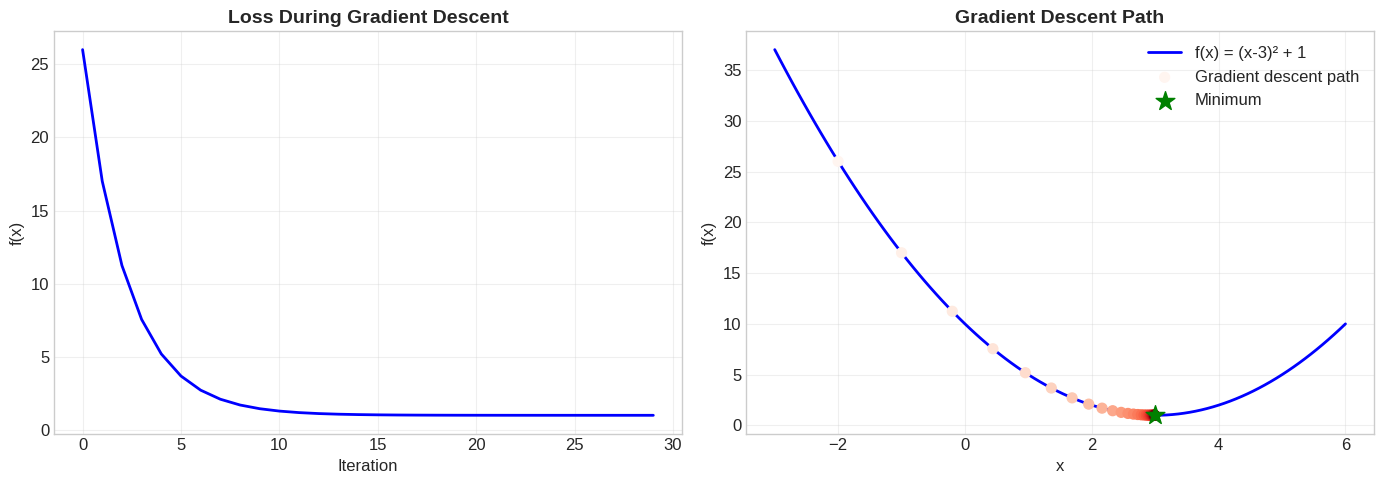

In [15]:
# ============================================================================
#                    VISUALIZING GRADIENT DESCENT
# ============================================================================

print("\n5. Gradient Descent in Action")
print("="*50)

# Minimize f(x) = (x - 3)^2 + 1
# Minimum at x = 3

x = torch.tensor([-2.0], requires_grad=True)
learning_rate = 0.1

history = {'x': [], 'f': []}

for i in range(30):
    # Record
    history['x'].append(x.item())

    # Forward pass
    f = (x - 3) ** 2 + 1
    history['f'].append(f.item())

    # Backward pass
    f.backward()

    # Gradient descent step
    with torch.no_grad():
        x -= learning_rate * x.grad

    # Zero gradient for next iteration
    x.grad.zero_()

print(f"   Starting x: {history['x'][0]:.2f}")
print(f"   Final x:    {history['x'][-1]:.4f} (target: 3.0)")
print(f"   Final f(x): {history['f'][-1]:.6f} (minimum: 1.0)")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
ax1.plot(history['f'], 'b-', linewidth=2)
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title('Loss During Gradient Descent', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Path on function surface
x_range = np.linspace(-3, 6, 100)
f_range = (x_range - 3) ** 2 + 1
ax2.plot(x_range, f_range, 'b-', linewidth=2, label='f(x) = (x-3)² + 1')
ax2.scatter(history['x'], history['f'], c=range(len(history['x'])),
            cmap='Reds', s=50, zorder=5, label='Gradient descent path')
ax2.scatter([3], [1], c='green', s=200, marker='*', zorder=6, label='Minimum')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)
ax2.set_title('Gradient Descent Path', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

# Part IV: Neural Network from Scratch (PyTorch Primitives)

## Rebuilding What We Made in NumPy

Now let's rebuild our neural network using **only basic PyTorch operations** - no `nn.Module` yet!

This helps you understand:
1. How PyTorch tensors work
2. How autograd eliminates manual backprop
3. What the high-level APIs do under the hood

In [16]:
# ============================================================================
#            ACTIVATION FUNCTIONS (PyTorch Primitive Style)
# ============================================================================

print("="*60)
print("       ACTIVATION FUNCTIONS (Primitive Style)")
print("="*60)

# We don't need backward methods anymore - autograd handles it!

def sigmoid(x: torch.Tensor) -> torch.Tensor:
    """Sigmoid activation: 1 / (1 + exp(-x))"""
    return 1 / (1 + torch.exp(-x.clamp(-500, 500)))

def tanh(x: torch.Tensor) -> torch.Tensor:
    """Hyperbolic tangent activation"""
    return torch.tanh(x)

def relu(x: torch.Tensor) -> torch.Tensor:
    """Rectified Linear Unit: max(0, x)"""
    return torch.maximum(x, torch.zeros_like(x))

def leaky_relu(x: torch.Tensor, alpha: float = 0.01) -> torch.Tensor:
    """Leaky ReLU: x if x > 0 else alpha * x"""
    return torch.where(x > 0, x, alpha * x)

def softmax(x: torch.Tensor) -> torch.Tensor:
    """Softmax: exp(x) / sum(exp(x))"""
    exp_x = torch.exp(x - x.max(dim=-1, keepdim=True).values)
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

# Test
x = torch.linspace(-3, 3, 7)
print(f"\nInput:        {x.tolist()}")
print(f"sigmoid(x):   {[f'{v:.3f}' for v in sigmoid(x).tolist()]}")
print(f"relu(x):      {relu(x).tolist()}")
print(f"leaky_relu:   {[f'{v:.3f}' for v in leaky_relu(x).tolist()]}")

       ACTIVATION FUNCTIONS (Primitive Style)

Input:        [-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0]
sigmoid(x):   ['0.047', '0.119', '0.269', '0.500', '0.731', '0.881', '0.953']
relu(x):      [0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 3.0]
leaky_relu:   ['-0.030', '-0.020', '-0.010', '0.000', '1.000', '2.000', '3.000']


In [17]:
# ============================================================================
#              LOSS FUNCTIONS (PyTorch Primitive Style)
# ============================================================================

print("="*60)
print("         LOSS FUNCTIONS (Primitive Style)")
print("="*60)

def mse_loss(y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
    """
    Mean Squared Error Loss
    L = (1/n) * sum((y_pred - y_true)^2)
    """
    return ((y_pred - y_true) ** 2).mean()

def binary_cross_entropy_loss(y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
    """
    Binary Cross-Entropy Loss
    L = -mean(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))
    """
    epsilon = 1e-15
    y_pred = y_pred.clamp(epsilon, 1 - epsilon)
    return -(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred)).mean()

def categorical_cross_entropy_loss(y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
    """
    Categorical Cross-Entropy Loss
    L = -mean(sum(y_true * log(y_pred)))
    """
    epsilon = 1e-15
    y_pred = y_pred.clamp(epsilon, 1 - epsilon)
    return -(y_true * torch.log(y_pred)).sum(dim=-1).mean()

# Test
y_pred = torch.tensor([0.9, 0.1, 0.8])
y_true = torch.tensor([1.0, 0.0, 1.0])

print(f"\ny_pred: {y_pred.tolist()}")
print(f"y_true: {y_true.tolist()}")
print(f"MSE Loss: {mse_loss(y_pred, y_true):.6f}")
print(f"BCE Loss: {binary_cross_entropy_loss(y_pred, y_true):.6f}")

         LOSS FUNCTIONS (Primitive Style)

y_pred: [0.8999999761581421, 0.10000000149011612, 0.800000011920929]
y_true: [1.0, 0.0, 1.0]
MSE Loss: 0.020000
BCE Loss: 0.144622


In [18]:
# ============================================================================
#          NEURAL NETWORK FROM SCRATCH (PyTorch Primitives Only)
# ============================================================================

print("="*60)
print("    NEURAL NETWORK (PyTorch Primitives Only)")
print("="*60)

class NeuralNetworkPrimitive:
    """
    Neural Network using only basic PyTorch operations.

    NO nn.Module, NO nn.Linear, NO optim!
    Just tensors and autograd.

    This demonstrates:
    - Manual parameter management
    - Forward pass with basic ops
    - Autograd handling backpropagation
    - Manual gradient descent
    """

    def __init__(self, layer_sizes: List[int], activation: str = 'relu'):
        """
        Initialize network with given architecture.

        Parameters
        ----------
        layer_sizes : list
            Sizes of each layer, e.g., [2, 16, 8, 1]
        activation : str
            Activation function: 'relu', 'tanh', 'sigmoid'
        """
        self.layer_sizes = layer_sizes
        self.activation_name = activation

        # Select activation function
        self.activation = {
            'relu': relu,
            'tanh': tanh,
            'sigmoid': sigmoid,
            'leaky_relu': leaky_relu
        }[activation]

        # Initialize weights and biases
        # Using He initialization: W ~ N(0, sqrt(2/n_in))
        self.weights = []
        self.biases = []

        for i in range(len(layer_sizes) - 1):
            n_in, n_out = layer_sizes[i], layer_sizes[i + 1]

            # He initialization
            W = torch.randn(n_in, n_out) * (2.0 / n_in) ** 0.5
            b = torch.zeros(n_out)

            # CRUCIAL: Enable gradient tracking!
            W.requires_grad_(True)
            b.requires_grad_(True)

            self.weights.append(W)
            self.biases.append(b)

        self.history = {'loss': [], 'accuracy': []}

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        """
        Forward pass through the network.

        For each layer:
        1. Linear transformation: Z = X @ W + b
        2. Activation (except last layer): A = activation(Z)
        """
        out = X

        # Hidden layers with activation
        for i in range(len(self.weights) - 1):
            out = out @ self.weights[i] + self.biases[i]
            out = self.activation(out)

        # Output layer (no activation for now, or sigmoid for binary)
        out = out @ self.weights[-1] + self.biases[-1]

        return out

    def parameters(self) -> List[torch.Tensor]:
        """Return all trainable parameters."""
        return self.weights + self.biases

    def zero_grad(self) -> None:
        """Zero all parameter gradients."""
        for param in self.parameters():
            if param.grad is not None:
                param.grad.zero_()

    def fit(
        self,
        X: torch.Tensor,
        y: torch.Tensor,
        epochs: int = 100,
        learning_rate: float = 0.01,
        loss_fn: str = 'mse',
        verbose: bool = True
    ):
        """
        Train the network using gradient descent.

        The beauty: We don't need to implement backprop!
        PyTorch's autograd does it automatically.
        """
        # Select loss function
        loss_functions = {
            'mse': mse_loss,
            'bce': binary_cross_entropy_loss,
            'cce': categorical_cross_entropy_loss
        }
        compute_loss = loss_functions[loss_fn]

        for epoch in range(epochs):
            # ----- Forward Pass -----
            y_pred = self.forward(X)

            # Apply sigmoid for binary classification
            if loss_fn == 'bce':
                y_pred = sigmoid(y_pred)
            elif loss_fn == 'cce':
                y_pred = softmax(y_pred)

            # ----- Compute Loss -----
            loss = compute_loss(y_pred, y)
            self.history['loss'].append(loss.item())

            # ----- Backward Pass (AUTOMATIC!) -----
            self.zero_grad()  # Clear old gradients
            loss.backward()   # Compute new gradients

            # ----- Gradient Descent Update -----
            with torch.no_grad():  # Don't track these operations
                for param in self.parameters():
                    param -= learning_rate * param.grad

            # Compute accuracy
            with torch.no_grad():
                if loss_fn == 'bce':
                    predictions = (y_pred > 0.5).float()
                    accuracy = (predictions == y).float().mean().item()
                elif loss_fn == 'cce':
                    predictions = y_pred.argmax(dim=-1)
                    targets = y.argmax(dim=-1)
                    accuracy = (predictions == targets).float().mean().item()
                else:
                    accuracy = 0
                self.history['accuracy'].append(accuracy)

            # Print progress
            if verbose and (epoch + 1) % max(1, epochs // 10) == 0:
                print(f"Epoch {epoch+1:4d}/{epochs} | Loss: {loss.item():.6f} | Acc: {accuracy:.4f}")

        return self.history

    def predict(self, X: torch.Tensor) -> torch.Tensor:
        """Make predictions."""
        with torch.no_grad():
            return self.forward(X)

    def summary(self):
        """Print network summary."""
        print("\n" + "="*50)
        print("        NETWORK SUMMARY (Primitive)")
        print("="*50)
        total_params = 0
        for i, (W, b) in enumerate(zip(self.weights, self.biases)):
            params = W.numel() + b.numel()
            total_params += params
            print(f"Layer {i+1}: {W.shape[0]} -> {W.shape[1]} | Params: {params}")
        print("-"*50)
        print(f"Total Parameters: {total_params}")
        print(f"Activation: {self.activation_name}")
        print("="*50)


print("\nNeuralNetworkPrimitive class created!")
print("Uses only: torch.Tensor, basic ops, and autograd")

    NEURAL NETWORK (PyTorch Primitives Only)

NeuralNetworkPrimitive class created!
Uses only: torch.Tensor, basic ops, and autograd



        TEST: XOR PROBLEM (Primitive Network)

        NETWORK SUMMARY (Primitive)
Layer 1: 2 -> 8 | Params: 24
Layer 2: 8 -> 1 | Params: 9
--------------------------------------------------
Total Parameters: 33
Activation: tanh

Training...

Epoch  100/1000 | Loss: 0.127840 | Acc: 1.0000
Epoch  200/1000 | Loss: 0.031205 | Acc: 1.0000
Epoch  300/1000 | Loss: 0.015970 | Acc: 1.0000
Epoch  400/1000 | Loss: 0.010462 | Acc: 1.0000
Epoch  500/1000 | Loss: 0.007700 | Acc: 1.0000
Epoch  600/1000 | Loss: 0.006061 | Acc: 1.0000
Epoch  700/1000 | Loss: 0.004982 | Acc: 1.0000
Epoch  800/1000 | Loss: 0.004221 | Acc: 1.0000
Epoch  900/1000 | Loss: 0.003657 | Acc: 1.0000
Epoch 1000/1000 | Loss: 0.003223 | Acc: 1.0000

----------------------------------------
PREDICTIONS
----------------------------------------
Input: [0.0, 0.0] | True: 0 | Pred: 0.0008 | Rounded: 0
Input: [0.0, 1.0] | True: 1 | Pred: 0.9964 | Rounded: 1
Input: [1.0, 0.0] | True: 1 | Pred: 0.9966 | Rounded: 1
Input: [1.0, 1.0] | Tru

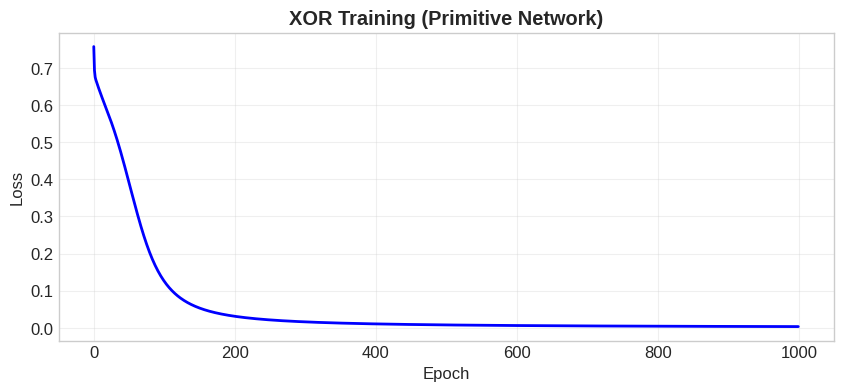

In [19]:
# ============================================================================
#                    TEST: XOR PROBLEM (Primitives)
# ============================================================================

print("\n" + "="*60)
print("        TEST: XOR PROBLEM (Primitive Network)")
print("="*60)

# XOR dataset
X_xor = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y_xor = torch.tensor([[0.], [1.], [1.], [0.]])

# Create and train network
xor_net = NeuralNetworkPrimitive(
    layer_sizes=[2, 8, 1],
    activation='tanh'
)
xor_net.summary()

print("\nTraining...\n")
history = xor_net.fit(
    X_xor, y_xor,
    epochs=1000,
    learning_rate=0.5,
    loss_fn='bce',
    verbose=True
)

# Test predictions
print("\n" + "-"*40)
print("PREDICTIONS")
print("-"*40)

with torch.no_grad():
    predictions = sigmoid(xor_net.forward(X_xor))
    for x, y_true, y_pred in zip(X_xor, y_xor, predictions):
        print(f"Input: {x.tolist()} | True: {y_true.item():.0f} | Pred: {y_pred.item():.4f} | Rounded: {round(y_pred.item())}")

# Plot training
plt.figure(figsize=(10, 4))
plt.plot(history['loss'], 'b-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('XOR Training (Primitive Network)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

---

# Part V: The High-Level API (nn.Module)

## PyTorch's Elegant Abstraction

Now that you understand the primitives, let's see how PyTorch's `nn.Module` makes everything cleaner:

| Primitive Approach | nn.Module Approach |
|-------------------|--------------------|
| Manual weight init | `nn.Linear` handles it |
| Manual parameter list | `.parameters()` auto-collects |
| Manual gradient zeroing | `optimizer.zero_grad()` |
| Manual updates | `optimizer.step()` |
| Manual device management | `.to(device)` moves everything |

In [20]:
# ============================================================================
#                         nn.Linear EXPLAINED
# ============================================================================

print("="*60)
print("              nn.Linear EXPLAINED")
print("="*60)

# nn.Linear is a fully connected layer
# It does: output = input @ weight.T + bias

linear = nn.Linear(in_features=3, out_features=2)

print(f"\nnn.Linear(3, 2):")
print(f"  Weight shape: {linear.weight.shape}  (out_features x in_features)")
print(f"  Bias shape:   {linear.bias.shape}    (out_features)")
print(f"\n  Weight:\n{linear.weight}")
print(f"\n  Bias: {linear.bias}")

# Forward pass
x = torch.tensor([[1., 2., 3.]])
output = linear(x)

print(f"\n  Input:  {x}")
print(f"  Output: {output}")

# Verify: output = x @ W.T + b
manual_output = x @ linear.weight.T + linear.bias
print(f"  Manual: {manual_output}")
print(f"  Match:  {torch.allclose(output, manual_output)}")

              nn.Linear EXPLAINED

nn.Linear(3, 2):
  Weight shape: torch.Size([2, 3])  (out_features x in_features)
  Bias shape:   torch.Size([2])    (out_features)

  Weight:
Parameter containing:
tensor([[-0.3398,  0.0779, -0.3403],
        [-0.3759,  0.3009, -0.0970]], requires_grad=True)

  Bias: Parameter containing:
tensor([0.5276, 0.5616], requires_grad=True)

  Input:  tensor([[1., 2., 3.]])
  Output: tensor([[-0.6774,  0.4967]], grad_fn=<AddmmBackward0>)
  Manual: tensor([[-0.6774,  0.4967]], grad_fn=<AddBackward0>)
  Match:  True


In [21]:
# ============================================================================
#                    nn.Module: THE BASE CLASS
# ============================================================================

print("="*60)
print("           nn.Module: THE BASE CLASS")
print("="*60)

class SimpleNet(nn.Module):
    """
    A simple neural network using nn.Module.

    Key points:
    1. Inherit from nn.Module
    2. Call super().__init__() in __init__
    3. Define layers as attributes
    4. Implement forward() method
    """

    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()  # IMPORTANT!

        # Define layers - they're automatically registered!
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

        # Activation (stateless, doesn't need to be registered)
        self.relu = nn.ReLU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Define the forward pass.

        This is called when you do model(x).
        """
        x = self.fc1(x)      # Linear
        x = self.relu(x)     # Activation
        x = self.fc2(x)      # Linear
        return x


# Create model
model = SimpleNet(input_size=3, hidden_size=4, output_size=2)

print(f"\nModel structure:")
print(model)

print(f"\nAll parameters (auto-collected!):")
for name, param in model.named_parameters():
    print(f"  {name}: {param.shape}")

total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params}")

# Forward pass
x = torch.randn(2, 3)  # Batch of 2, 3 features each
output = model(x)       # Calls forward() automatically!
print(f"\nInput shape:  {x.shape}")
print(f"Output shape: {output.shape}")

           nn.Module: THE BASE CLASS

Model structure:
SimpleNet(
  (fc1): Linear(in_features=3, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=2, bias=True)
  (relu): ReLU()
)

All parameters (auto-collected!):
  fc1.weight: torch.Size([4, 3])
  fc1.bias: torch.Size([4])
  fc2.weight: torch.Size([2, 4])
  fc2.bias: torch.Size([2])

Total parameters: 26

Input shape:  torch.Size([2, 3])
Output shape: torch.Size([2, 2])


In [22]:
# ============================================================================
#              FLEXIBLE NETWORK WITH nn.Sequential
# ============================================================================

print("="*60)
print("        FLEXIBLE NETWORKS WITH nn.Sequential")
print("="*60)

# Method 1: nn.Sequential (simple sequential models)
sequential_net = nn.Sequential(
    nn.Linear(2, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

print("\nMethod 1: nn.Sequential")
print(sequential_net)

# Method 2: Dynamic architecture
def create_mlp(layer_sizes: List[int], activation: nn.Module = nn.ReLU()) -> nn.Sequential:
    """
    Create a Multi-Layer Perceptron with given architecture.

    Parameters
    ----------
    layer_sizes : list
        e.g., [784, 256, 128, 10] for MNIST
    activation : nn.Module
        Activation function between layers
    """
    layers = []

    for i in range(len(layer_sizes) - 1):
        layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))

        # Add activation after all layers except the last
        if i < len(layer_sizes) - 2:
            layers.append(activation)

    return nn.Sequential(*layers)

# Create networks with different architectures
small_net = create_mlp([2, 8, 1])
medium_net = create_mlp([784, 256, 128, 10])
deep_net = create_mlp([100, 64, 64, 64, 64, 10], activation=nn.LeakyReLU())

print("\nMethod 2: Dynamic creation")
print(f"\nSmall net (2->8->1):")
print(small_net)

print(f"\nDeep net with LeakyReLU:")
print(deep_net)

        FLEXIBLE NETWORKS WITH nn.Sequential

Method 1: nn.Sequential
Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)

Method 2: Dynamic creation

Small net (2->8->1):
Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

Deep net with LeakyReLU:
Sequential(
  (0): Linear(in_features=100, out_features=64, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=64, out_features=64, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=64, out_features=10, bias=True)
)


In [23]:
# ============================================================================
#                      COMPLETE NEURAL NETWORK CLASS
# ============================================================================

print("="*60)
print("       COMPLETE NEURAL NETWORK (High-Level API)")
print("="*60)

class NeuralNetwork(nn.Module):
    """
    Flexible Neural Network using PyTorch's high-level API.

    This is the "production-ready" version of our primitive network.

    Features:
    - Dynamic architecture
    - Multiple activation options
    - Dropout for regularization
    - Batch normalization option
    - GPU support
    """

    def __init__(
        self,
        layer_sizes: List[int],
        activation: str = 'relu',
        dropout: float = 0.0,
        batch_norm: bool = False
    ):
        super().__init__()

        self.layer_sizes = layer_sizes

        # Activation functions
        activations = {
            'relu': nn.ReLU(),
            'tanh': nn.Tanh(),
            'sigmoid': nn.Sigmoid(),
            'leaky_relu': nn.LeakyReLU(),
            'elu': nn.ELU(),
            'gelu': nn.GELU()  # Used in Transformers!
        }
        activation_fn = activations[activation]

        # Build layers
        layers = []
        for i in range(len(layer_sizes) - 1):
            # Linear layer
            layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))

            # Only add activation/dropout/batchnorm to hidden layers
            if i < len(layer_sizes) - 2:
                if batch_norm:
                    layers.append(nn.BatchNorm1d(layer_sizes[i + 1]))
                layers.append(activation_fn)
                if dropout > 0:
                    layers.append(nn.Dropout(dropout))

        self.network = nn.Sequential(*layers)

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        """Initialize weights using Kaiming (He) initialization."""
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.kaiming_normal_(module.weight, nonlinearity='relu')
                if module.bias is not None:
                    nn.init.zeros_(module.bias)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.network(x)

    def summary(self):
        """Print model summary."""
        print("\n" + "="*60)
        print("                MODEL SUMMARY")
        print("="*60)
        print(self)
        print("-"*60)
        total_params = sum(p.numel() for p in self.parameters())
        trainable = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"Total parameters:     {total_params:,}")
        print(f"Trainable parameters: {trainable:,}")
        print("="*60)


# Create model
model = NeuralNetwork(
    layer_sizes=[2, 32, 16, 1],
    activation='relu',
    dropout=0.1,
    batch_norm=False
)

model.summary()

       COMPLETE NEURAL NETWORK (High-Level API)

                MODEL SUMMARY
NeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)
------------------------------------------------------------
Total parameters:     641
Trainable parameters: 641


In [24]:
# ============================================================================
#                           OPTIMIZERS
# ============================================================================

print("="*60)
print("                  OPTIMIZERS")
print("="*60)

model = NeuralNetwork([2, 16, 1])

# PyTorch provides many optimizers!
optimizers_demo = {
    'SGD': torch.optim.SGD(model.parameters(), lr=0.01),
    'SGD+Momentum': torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
    'Adam': torch.optim.Adam(model.parameters(), lr=0.001),
    'AdamW': torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01),
    'RMSprop': torch.optim.RMSprop(model.parameters(), lr=0.01),
}

print("\nAvailable optimizers:")
for name, opt in optimizers_demo.items():
    print(f"  - {name}")

print("\n Adam is the most popular choice!")
print(" AdamW is Adam with decoupled weight decay (often better)")

                  OPTIMIZERS

Available optimizers:
  - SGD
  - SGD+Momentum
  - Adam
  - AdamW
  - RMSprop

 Adam is the most popular choice!
 AdamW is Adam with decoupled weight decay (often better)


In [25]:
# ============================================================================
#                    COMPLETE TRAINING FUNCTION
# ============================================================================

def train_model(
    model: nn.Module,
    X_train: torch.Tensor,
    y_train: torch.Tensor,
    X_val: Optional[torch.Tensor] = None,
    y_val: Optional[torch.Tensor] = None,
    epochs: int = 100,
    batch_size: int = 32,
    learning_rate: float = 0.001,
    loss_fn: nn.Module = nn.MSELoss(),
    optimizer_class = torch.optim.Adam,
    device: str = 'cpu',
    verbose: bool = True
) -> dict:
    """
    Complete training loop with all best practices.

    Parameters
    ----------
    model : nn.Module
        The neural network to train
    X_train, y_train : Tensors
        Training data
    X_val, y_val : Tensors, optional
        Validation data
    epochs : int
        Number of training epochs
    batch_size : int
        Mini-batch size
    learning_rate : float
        Learning rate for optimizer
    loss_fn : nn.Module
        Loss function
    optimizer_class : class
        Optimizer class (Adam, SGD, etc.)
    device : str
        'cpu' or 'cuda'
    verbose : bool
        Print progress

    Returns
    -------
    dict : Training history
    """
    # Move model and data to device
    model = model.to(device)
    X_train = X_train.to(device)
    y_train = y_train.to(device)
    if X_val is not None:
        X_val = X_val.to(device)
        y_val = y_val.to(device)

    # Create DataLoader for batching
    dataset = TensorDataset(X_train, y_train)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Setup optimizer
    optimizer = optimizer_class(model.parameters(), lr=learning_rate)

    # Training history
    history = {'loss': [], 'val_loss': []}

    for epoch in range(epochs):
        # ----- TRAINING PHASE -----
        model.train()  # Set to training mode (enables dropout, etc.)
        epoch_loss = 0
        n_batches = 0

        for X_batch, y_batch in dataloader:
            # Forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            # Backward pass
            optimizer.zero_grad()  # Clear gradients
            loss.backward()        # Compute gradients
            optimizer.step()       # Update weights

            epoch_loss += loss.item()
            n_batches += 1

        avg_loss = epoch_loss / n_batches
        history['loss'].append(avg_loss)

        # ----- VALIDATION PHASE -----
        if X_val is not None:
            model.eval()  # Set to evaluation mode
            with torch.no_grad():  # No gradient computation
                val_pred = model(X_val)
                val_loss = loss_fn(val_pred, y_val).item()
            history['val_loss'].append(val_loss)

        # Print progress
        if verbose and (epoch + 1) % max(1, epochs // 10) == 0:
            msg = f"Epoch {epoch+1:4d}/{epochs} | Loss: {avg_loss:.6f}"
            if X_val is not None:
                msg += f" | Val Loss: {val_loss:.6f}"
            print(msg)

    return history


print("Training function defined!")
print("\nKey elements:")
print("  1. model.train() - enables dropout, batch norm training mode")
print("  2. optimizer.zero_grad() - clears old gradients")
print("  3. loss.backward() - computes gradients")
print("  4. optimizer.step() - updates weights")
print("  5. model.eval() - disables dropout for validation")
print("  6. torch.no_grad() - no gradients during validation")

Training function defined!

Key elements:
  1. model.train() - enables dropout, batch norm training mode
  2. optimizer.zero_grad() - clears old gradients
  3. loss.backward() - computes gradients
  4. optimizer.step() - updates weights
  5. model.eval() - disables dropout for validation
  6. torch.no_grad() - no gradients during validation


---

# Part VI: Complete Training Examples

## Let's Put It All Together!

           DEMO 1: XOR (High-Level API)
Epoch  100/1000 | Loss: 0.000203
Epoch  200/1000 | Loss: 0.000140
Epoch  300/1000 | Loss: 0.000100
Epoch  400/1000 | Loss: 0.000074
Epoch  500/1000 | Loss: 0.000057
Epoch  600/1000 | Loss: 0.000045
Epoch  700/1000 | Loss: 0.000037
Epoch  800/1000 | Loss: 0.000031
Epoch  900/1000 | Loss: 0.000026
Epoch 1000/1000 | Loss: 0.000022

----------------------------------------
PREDICTIONS
----------------------------------------
Input: [0.0, 0.0] | True: 0 | Pred: 0.0000
Input: [0.0, 1.0] | True: 1 | Pred: 1.0000
Input: [1.0, 0.0] | True: 1 | Pred: 1.0000
Input: [1.0, 1.0] | True: 0 | Pred: 0.0000


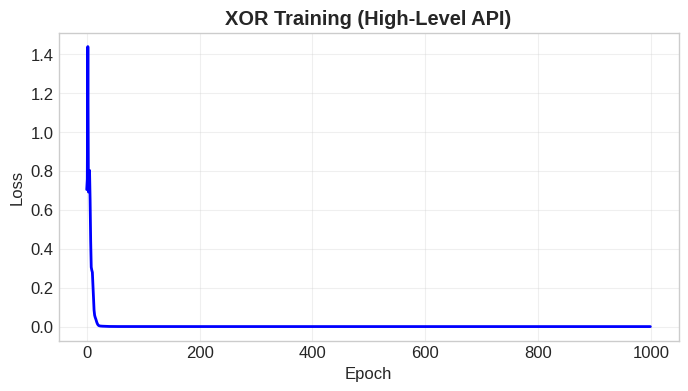

In [26]:
# ============================================================================
#                      DEMO 1: XOR (High-Level API)
# ============================================================================

print("="*60)
print("           DEMO 1: XOR (High-Level API)")
print("="*60)

# Data
X_xor = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y_xor = torch.tensor([[0.], [1.], [1.], [0.]])

# Model
xor_model = nn.Sequential(
    nn.Linear(2, 8),
    nn.Tanh(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

# Train
history = train_model(
    xor_model,
    X_xor, y_xor,
    epochs=1000,
    batch_size=4,
    learning_rate=0.5,
    loss_fn=nn.BCELoss(),
    verbose=True
)

# Results
print("\n" + "-"*40)
print("PREDICTIONS")
print("-"*40)
xor_model.eval()
with torch.no_grad():
    predictions = xor_model(X_xor)
    for x, y_true, y_pred in zip(X_xor, y_xor, predictions):
        print(f"Input: {x.tolist()} | True: {y_true.item():.0f} | Pred: {y_pred.item():.4f}")

# Plot
plt.figure(figsize=(8, 4))
plt.plot(history['loss'], 'b-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('XOR Training (High-Level API)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

           DEMO 2: MOONS CLASSIFICATION
Epoch   50/500 | Loss: 0.022472 | Val Loss: 0.010336
Epoch  100/500 | Loss: 0.016627 | Val Loss: 0.013869
Epoch  150/500 | Loss: 0.017408 | Val Loss: 0.014034
Epoch  200/500 | Loss: 0.026777 | Val Loss: 0.032067
Epoch  250/500 | Loss: 0.012843 | Val Loss: 0.014884
Epoch  300/500 | Loss: 0.010259 | Val Loss: 0.011564
Epoch  350/500 | Loss: 0.008913 | Val Loss: 0.005768
Epoch  400/500 | Loss: 0.015990 | Val Loss: 0.012508
Epoch  450/500 | Loss: 0.009726 | Val Loss: 0.010462
Epoch  500/500 | Loss: 0.010548 | Val Loss: 0.013451

Validation Accuracy: 99.00%


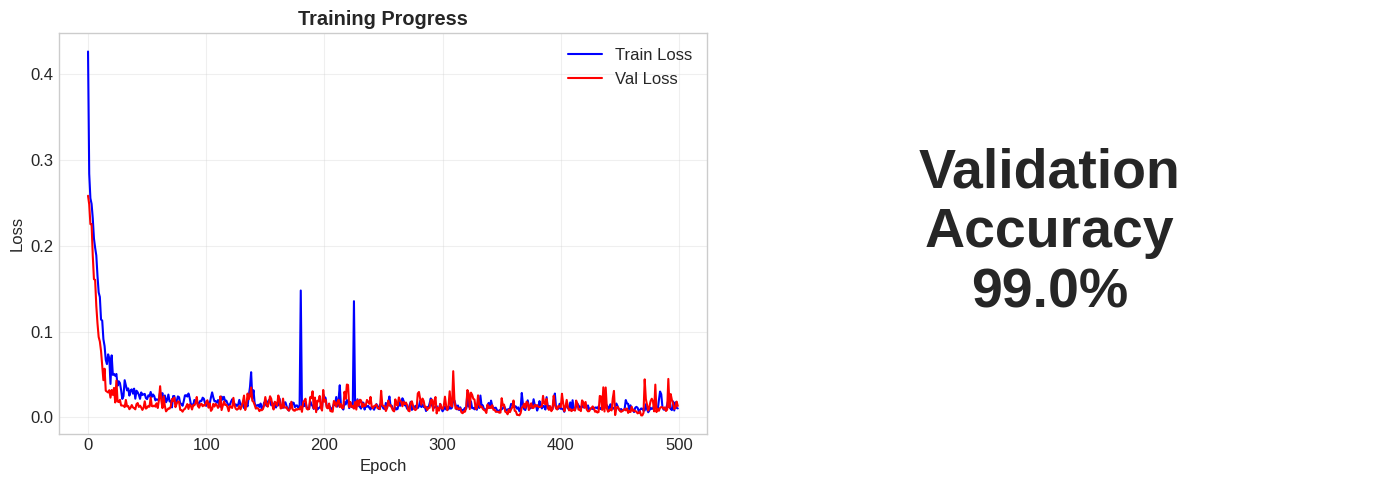

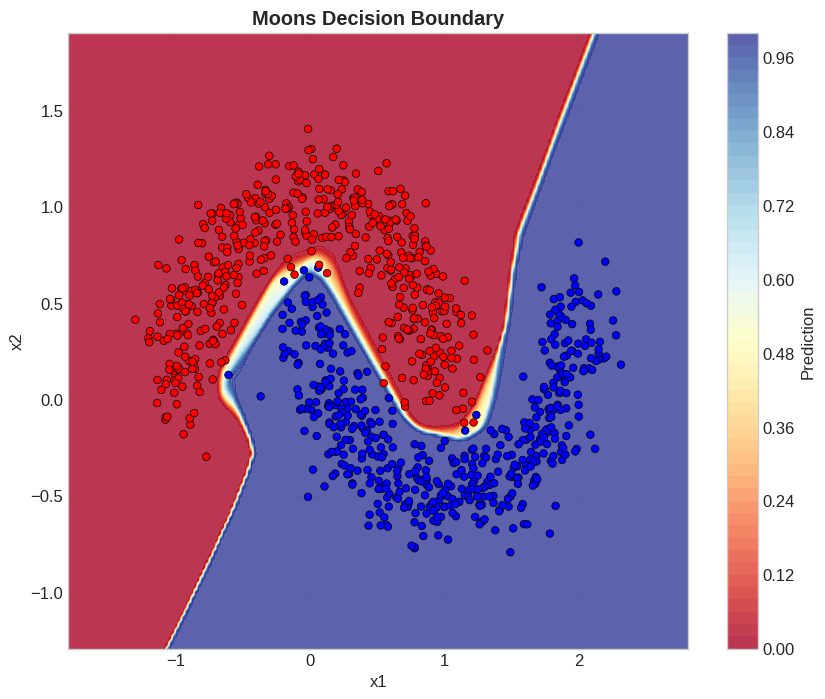

In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt

print("="*60)
print("           DEMO 2: MOONS CLASSIFICATION")
print("="*60)

# Generate moons dataset
def make_moons(n_samples=500, noise=0.1):
    n_per_class = n_samples // 2

    # Moon 1
    theta1 = torch.linspace(0, np.pi, n_per_class)
    x1 = torch.stack([torch.cos(theta1), torch.sin(theta1)], dim=1)

    # Moon 2
    theta2 = torch.linspace(0, np.pi, n_per_class)
    x2 = torch.stack([1 - torch.cos(theta2), 0.5 - torch.sin(theta2)], dim=1)

    X = torch.cat([x1, x2]) + torch.randn(n_samples, 2) * noise
    y = torch.cat([torch.zeros(n_per_class), torch.ones(n_per_class)]).unsqueeze(1)

    return X, y

# Data
X_moons, y_moons = make_moons(1000, noise=0.15)

# --- Shuffling the data ---
# Generate random indices
shuffled_indices = torch.randperm(X_moons.size(0))
# Apply the same shuffled indices to both X and y
X_moons = X_moons[shuffled_indices]
y_moons = y_moons[shuffled_indices]
# ---------------------------

# Split
X_train, X_val = X_moons[:800], X_moons[800:]
y_train, y_val = y_moons[:800], y_moons[800:]

# Model
moon_model = NeuralNetwork(
    layer_sizes=[2,64,32,16, 1],
    activation='relu',
    dropout=0.2
)

# Add sigmoid for binary classification
moon_model = nn.Sequential(moon_model, nn.Sigmoid())

# Train
history = train_model(
    moon_model,
    X_train, y_train,
    X_val, y_val,
    epochs=500,
    batch_size=32,
    learning_rate=0.005,
    loss_fn=nn.BCELoss(),
    verbose=True
)

# Visualize decision boundary
def plot_decision_boundary_torch(model, X, y, title="Decision Boundary"):
    model.eval()

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    with torch.no_grad():
        Z = model(grid).numpy().reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.8)
    plt.colorbar(label='Prediction')

    colors = ['red' if label == 0 else 'blue' for label in y.flatten()]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, edgecolors='black', linewidth=0.5)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history['loss'], 'b-', label='Train Loss')
ax1.plot(history['val_loss'], 'r-', label='Val Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Progress', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy
moon_model.eval()
with torch.no_grad():
    val_pred = (moon_model(X_val) > 0.5).float()
    accuracy = (val_pred == y_val).float().mean()
    print(f"\nValidation Accuracy: {accuracy.item()*100:.2f}%")

ax2.text(0.5, 0.5, f'Validation\nAccuracy\n{accuracy.item()*100:.1f}%',
         ha='center', va='center', fontsize=40, fontweight='bold',
         transform=ax2.transAxes)
ax2.axis('off')

plt.tight_layout()
plt.show()

plot_decision_boundary_torch(moon_model, X_moons, y_moons, "Moons Decision Boundary")

           DEMO 3: DIGIT CLASSIFICATION
Training samples: 1437
Test samples:     360
Features:         64
Classes:          10 (digits 0-9)

Training...

Epoch  10/100 | Loss: 2.0532 | Train Acc: 0.6145 | Test Acc: 0.6250
Epoch  20/100 | Loss: 1.6400 | Train Acc: 0.6813 | Test Acc: 0.6889
Epoch  30/100 | Loss: 1.1496 | Train Acc: 0.7864 | Test Acc: 0.8000
Epoch  40/100 | Loss: 0.7342 | Train Acc: 0.8810 | Test Acc: 0.8778
Epoch  50/100 | Loss: 0.4742 | Train Acc: 0.9207 | Test Acc: 0.8972
Epoch  60/100 | Loss: 0.3275 | Train Acc: 0.9422 | Test Acc: 0.9139
Epoch  70/100 | Loss: 0.2282 | Train Acc: 0.9645 | Test Acc: 0.9361
Epoch  80/100 | Loss: 0.1819 | Train Acc: 0.9770 | Test Acc: 0.9472
Epoch  90/100 | Loss: 0.1412 | Train Acc: 0.9847 | Test Acc: 0.9639
Epoch 100/100 | Loss: 0.1225 | Train Acc: 0.9896 | Test Acc: 0.9639

Final Test Accuracy: 96.39%


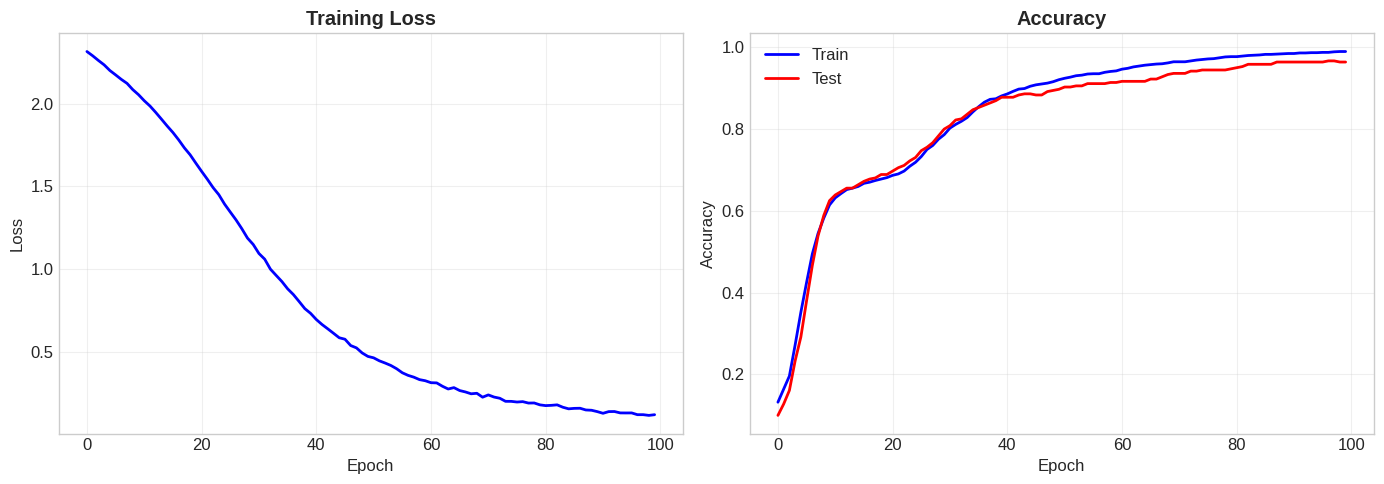

In [28]:
# ============================================================================
#                   DEMO 3: DIGIT CLASSIFICATION
# ============================================================================

print("="*60)
print("           DEMO 3: DIGIT CLASSIFICATION")
print("="*60)

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
digits = load_digits()
X, y = digits.data, digits.target

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples:     {X_test.shape[0]}")
print(f"Features:         {X_train.shape[1]}")
print(f"Classes:          10 (digits 0-9)")

# Model for multi-class classification
digit_model = nn.Sequential(
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 10)  # 10 classes, no softmax (CrossEntropyLoss includes it)
)

# Optimizer and loss
optimizer = torch.optim.Adam(digit_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()  # Combines LogSoftmax + NLLLoss

# Training loop
epochs = 100
history = {'loss': [], 'accuracy': [], 'val_accuracy': []}

print("\nTraining...\n")
for epoch in range(epochs):
    # Training
    digit_model.train()
    optimizer.zero_grad()

    outputs = digit_model(X_train)
    loss = loss_fn(outputs, y_train)

    loss.backward()
    optimizer.step()

    history['loss'].append(loss.item())

    # Evaluation
    digit_model.eval()
    with torch.no_grad():
        train_pred = digit_model(X_train).argmax(dim=1)
        train_acc = (train_pred == y_train).float().mean().item()

        test_pred = digit_model(X_test).argmax(dim=1)
        test_acc = (test_pred == y_test).float().mean().item()

    history['accuracy'].append(train_acc)
    history['val_accuracy'].append(test_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:3d}/{epochs} | Loss: {loss.item():.4f} | "
              f"Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# Final results
print(f"\nFinal Test Accuracy: {history['val_accuracy'][-1]*100:.2f}%")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history['loss'], 'b-', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss', fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(history['accuracy'], 'b-', linewidth=2, label='Train')
ax2.plot(history['val_accuracy'], 'r-', linewidth=2, label='Test')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

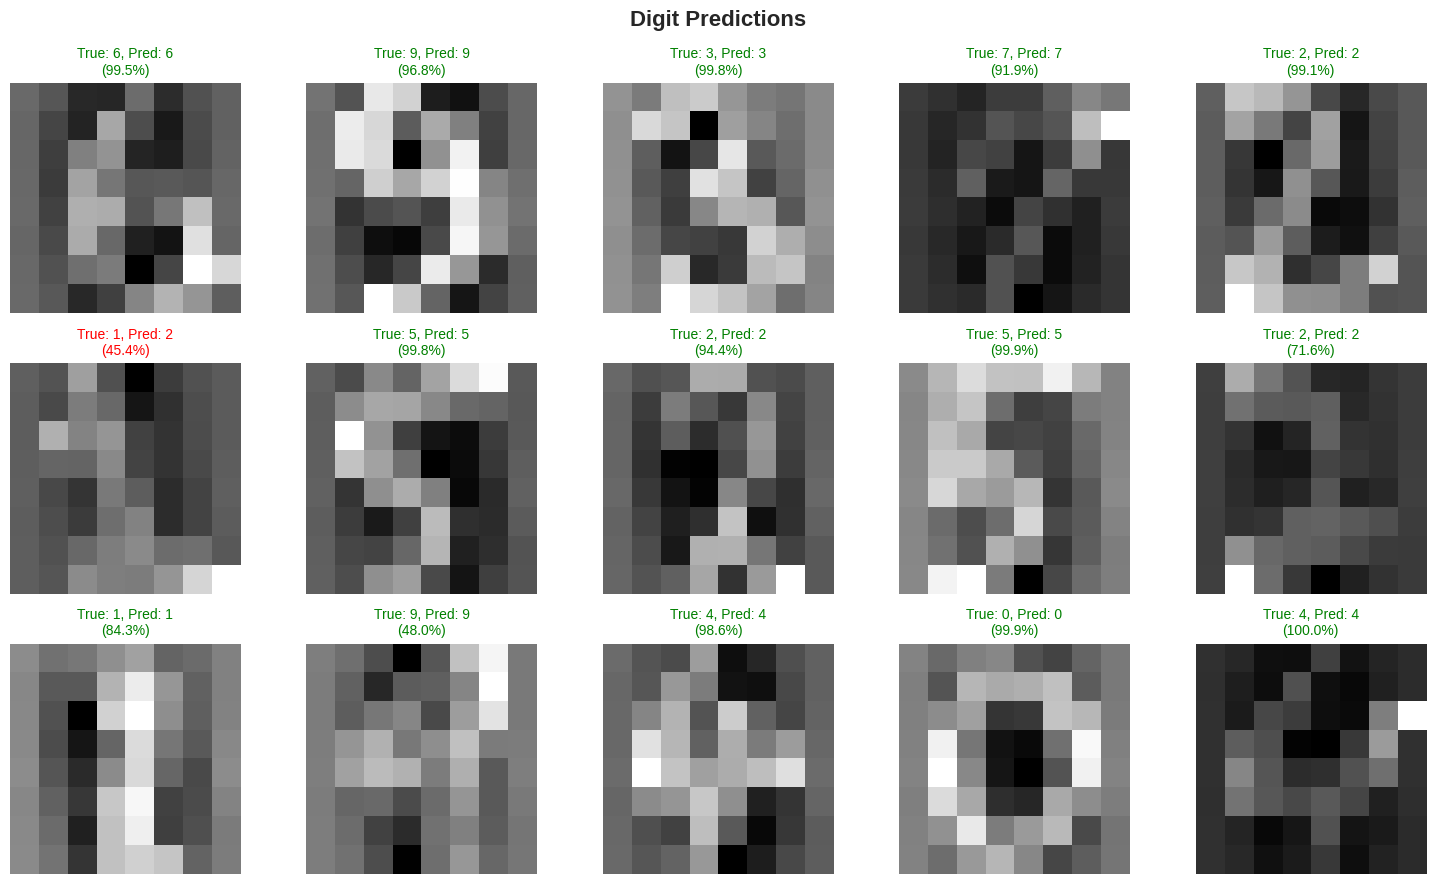

In [29]:
# ============================================================================
#                    VISUALIZE DIGIT PREDICTIONS
# ============================================================================

# Show predictions
digit_model.eval()
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Digit Predictions', fontsize=16, fontweight='bold')

with torch.no_grad():
    predictions = digit_model(X_test)
    probs = torch.softmax(predictions, dim=1)
    pred_classes = predictions.argmax(dim=1)

for i, ax in enumerate(axes.flatten()):
    img = X_test[i].numpy().reshape(8, 8)
    true_label = y_test[i].item()
    pred_label = pred_classes[i].item()
    confidence = probs[i][pred_label].item() * 100

    ax.imshow(img, cmap='gray')
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label}, Pred: {pred_label}\n({confidence:.1f}%)',
                 color=color, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

---

# Part VII: Comparison & Best Practices

## NumPy vs PyTorch Primitives vs High-Level API

In [30]:
# ============================================================================
#                     COMPARISON SUMMARY
# ============================================================================

print("="*70)
print("              COMPARISON: THREE APPROACHES")
print("="*70)

comparison = """
ASPECT                  NumPy              PyTorch Primitives    nn.Module
--------------------------------------------------------------------------------
Backpropagation         Manual             Automatic (autograd)  Automatic
GPU Support             No                 Yes                   Yes
Weight Management       Manual lists       Manual + requires_grad Auto-collected
Gradient Zeroing        Manual             Manual                optimizer.zero_grad()
Weight Updates          Manual             Manual w/ no_grad     optimizer.step()
Code Complexity         High               Medium                Low
Flexibility             Maximum            High                  High
Learning Value          Excellent          Excellent             Good for production
Production Use          No                 Sometimes             Yes
"""
print(comparison)

print("\n" + "="*70)
print("                    BEST PRACTICES")
print("="*70)

best_practices = """
1. ALWAYS use model.train() and model.eval()
   - train(): enables dropout, batch norm training mode
   - eval(): disables dropout, uses running stats for batch norm

2. ALWAYS use torch.no_grad() for inference
   - Saves memory (no gradient computation)
   - Faster execution

3. Move data AND model to same device
   - model = model.to(device)
   - data = data.to(device)

4. Use DataLoader for batching
   - Automatic shuffling
   - Parallel data loading (num_workers)
   - Memory efficient

5. Initialize weights properly
   - Kaiming (He) for ReLU
   - Xavier (Glorot) for tanh/sigmoid

6. Use learning rate schedulers
   - torch.optim.lr_scheduler
   - ReduceLROnPlateau, CosineAnnealingLR

7. Gradient clipping for stability
   - torch.nn.utils.clip_grad_norm_

8. Save and load models properly
   - torch.save(model.state_dict(), 'model.pth')
   - model.load_state_dict(torch.load('model.pth'))
"""
print(best_practices)

              COMPARISON: THREE APPROACHES

ASPECT                  NumPy              PyTorch Primitives    nn.Module
--------------------------------------------------------------------------------
Backpropagation         Manual             Automatic (autograd)  Automatic
GPU Support             No                 Yes                   Yes
Weight Management       Manual lists       Manual + requires_grad Auto-collected
Gradient Zeroing        Manual             Manual                optimizer.zero_grad()
Weight Updates          Manual             Manual w/ no_grad     optimizer.step()
Code Complexity         High               Medium                Low
Flexibility             Maximum            High                  High
Learning Value          Excellent          Excellent             Good for production
Production Use          No                 Sometimes             Yes


                    BEST PRACTICES

1. ALWAYS use model.train() and model.eval()
   - train(): enables dropout,

In [31]:
# ============================================================================
#                         CHEAT SHEET
# ============================================================================

print("="*70)
print("                  PYTORCH CHEAT SHEET")
print("="*70)

cheat_sheet = """
TENSORS
-------
torch.tensor([1,2,3])           # From list
torch.from_numpy(arr)           # From NumPy (shares memory!)
torch.zeros(2, 3)               # Zeros
torch.ones(2, 3)                # Ones
torch.randn(2, 3)               # Normal distribution
torch.rand(2, 3)                # Uniform [0, 1)
x.to('cuda')                    # Move to GPU
x.cpu().numpy()                 # To NumPy (must be on CPU)

OPERATIONS
----------
x + y, x - y, x * y, x / y      # Element-wise
x @ y, torch.matmul(x, y)       # Matrix multiplication
x.T, x.transpose(0, 1)          # Transpose
x.view(2, -1), x.reshape(2, -1) # Reshape
x.squeeze(), x.unsqueeze(0)     # Remove/add dimensions
torch.cat([x, y], dim=0)        # Concatenate
torch.stack([x, y], dim=0)      # Stack (new dimension)

EINSUM
------
torch.einsum('ij->ji', A)       # Transpose
torch.einsum('ij,jk->ik', A, B) # Matrix multiply
torch.einsum('bij,bjk->bik', A, B) # Batch matmul

AUTOGRAD
--------
x = torch.tensor([1.], requires_grad=True)
y = x ** 2
y.backward()                    # Compute gradients
x.grad                          # Access gradient
x.grad.zero_()                  # Zero gradient
with torch.no_grad(): ...       # Disable gradient tracking
x.detach()                      # Detach from graph

NEURAL NETWORKS
---------------
nn.Linear(in, out)              # Fully connected
nn.Conv2d(in_ch, out_ch, k)     # 2D convolution
nn.ReLU(), nn.Sigmoid()         # Activations
nn.Dropout(p)                   # Dropout
nn.BatchNorm1d(features)        # Batch normalization
nn.Sequential(layer1, layer2)  # Sequential container

TRAINING LOOP
-------------
model.train()                   # Training mode
optimizer.zero_grad()           # Clear gradients
loss = loss_fn(pred, target)    # Compute loss
loss.backward()                 # Backprop
optimizer.step()                # Update weights
model.eval()                    # Evaluation mode
"""
print(cheat_sheet)

                  PYTORCH CHEAT SHEET

TENSORS
-------
torch.tensor([1,2,3])           # From list
torch.from_numpy(arr)           # From NumPy (shares memory!)
torch.zeros(2, 3)               # Zeros
torch.ones(2, 3)                # Ones
torch.randn(2, 3)               # Normal distribution
torch.rand(2, 3)                # Uniform [0, 1)
x.to('cuda')                    # Move to GPU
x.cpu().numpy()                 # To NumPy (must be on CPU)

OPERATIONS
----------
x + y, x - y, x * y, x / y      # Element-wise
x @ y, torch.matmul(x, y)       # Matrix multiplication
x.T, x.transpose(0, 1)          # Transpose
x.view(2, -1), x.reshape(2, -1) # Reshape
x.squeeze(), x.unsqueeze(0)     # Remove/add dimensions
torch.cat([x, y], dim=0)        # Concatenate
torch.stack([x, y], dim=0)      # Stack (new dimension)

EINSUM
------
torch.einsum('ij->ji', A)       # Transpose
torch.einsum('ij,jk->ik', A, B) # Matrix multiply
torch.einsum('bij,bjk->bik', A, B) # Batch matmul

AUTOGRAD
--------
x =

---

# Conclusion

## Your PyTorch Journey

Congratulations! You've mastered PyTorch from fundamentals to production code.

### What You Learned

| Part | Topic | Key Takeaway |
|------|-------|-------------|
| I | Tensors | PyTorch tensors = NumPy arrays + GPU + autograd |
| II | Einsum | One function for all tensor operations |
| III | Autograd | Automatic differentiation = no manual backprop! |
| IV | Primitives | Understand what happens under the hood |
| V | nn.Module | Clean, production-ready code |
| VI | Training | Complete workflow with best practices |

### Next Steps

1. **Convolutional Neural Networks** - For images
2. **Recurrent Neural Networks** - For sequences
3. **Transformers** - The architecture behind LLMs
4. **Transfer Learning** - Stand on the shoulders of giants
5. **PyTorch Lightning** - Even cleaner training code

---

*"The only way to learn PyTorch is to use PyTorch."*

**Happy Deep Learning!**